In [34]:
# Loading main modules
import sys
import time
import os

# Loading common data related modules
import pandas as pd
import numpy as np
from math import sqrt
import tensorflow as tf
from tensorflow import keras

# Loading modeling algoritmes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model

# Loading tools
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.model_selection import  GridSearchCV
import missingno as msno

# Loading visualisation modules
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Configure visualisations
%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [35]:
# Read data
df = pd.read_csv('https://raw.githubusercontent.com/MarekLas/snails_final/master/snails.csv')

In [36]:
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [37]:
df=df.dropna()

In [38]:
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [39]:
# # Create the age column
# df['age'] = df['rings']+1.5
# df.drop('rings', axis = 1, inplace = True)

In [40]:
df[df.isnull().any(axis=1)]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings


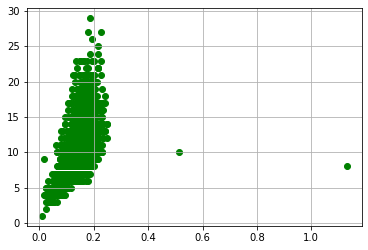

In [41]:
var = 'height'
plt.scatter(x = df[var], y = df['rings'],c='green')
plt.grid(True)

In [42]:
df.drop(df[(df['height']>0.4) & (df['rings'] < 15)].index, inplace=True)
df.drop(df[(df['height']<0.4) & (df['rings'] > 30)].index, inplace=True)

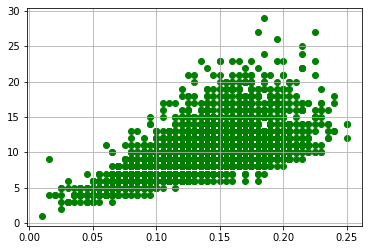

In [43]:
var = 'height'
plt.scatter(x = df[var], y = df['rings'],c='green')
plt.grid(True)

In [44]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [45]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["length","diameter","height","whole_weight","shucked_weight","viscera_weight","shell_weight"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex"])
)

In [46]:
# Create X & y
X = df.drop("rings", axis=1)
y = df["rings"]

In [47]:
# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [48]:
# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [49]:
'''
# Scaling values
sc = StandardScaler()
X_train_normal = sc.fit_transform(X_train_normal)
X_test_normal = sc.transform(X_test_normal)
X_train_normal
'''

'\n# Scaling values\nsc = StandardScaler()\nX_train_normal = sc.fit_transform(X_train_normal)\nX_test_normal = sc.transform(X_test_normal)\nX_train_normal\n'

In [50]:
# What does ourdata look like
X_train.loc[0]

sex                    M
length             0.455
diameter           0.365
height             0.095
whole_weight       0.514
shucked_weight    0.2245
viscera_weight     0.101
shell_weight        0.15
Name: 0, dtype: object

In [51]:
X_train_normal[0]

array([0.55405405, 0.56302521, 0.47916667, 0.20860634, 0.19233356,
       0.18499013, 0.1180867 , 0.        , 1.        , 0.        ])

In [52]:
X_train.shape, X_train_normal.shape

((3338, 8), (3338, 10))

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
abalone_model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
abalone_model_7.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics=["mae"])

# 3. Fit the model
history_7 = abalone_model_7.fit(X_train_normal, y_train, epochs=1000)

Epoch 1/1000
105/105 [==============================] - 1s 2ms/step - loss: 8.5914 - mae: 8.5914
Epoch 2/1000
105/105 [==============================] - 0s 2ms/step - loss: 6.9916 - mae: 6.9916
Epoch 3/1000
105/105 [==============================] - 0s 2ms/step - loss: 4.7889 - mae: 4.7889
Epoch 4/1000
105/105 [==============================] - 0s 2ms/step - loss: 2.3969 - mae: 2.3969
Epoch 5/1000
105/105 [==============================] - 0s 2ms/step - loss: 1.8928 - mae: 1.8928
Epoch 6/1000
105/105 [==============================] - 0s 2ms/step - loss: 1.8632 - mae: 1.8632
Epoch 7/1000
105/105 [==============================] - 0s 2ms/step - loss: 1.8482 - mae: 1.8482
Epoch 8/1000
105/105 [==============================] - 0s 2ms/step - loss: 1.8374 - mae: 1.8374
Epoch 9/1000
105/105 [==============================] - 0s 2ms/step - loss: 1.8275 - mae: 1.8275
Epoch 10/1000
105/105 [==============================] - 0s 2ms/step - loss: 1.8176 - mae: 1.8176
Epoch 11/1000
105/105 [======

In [54]:
# Evaluate the abalone_model_2
abalone_model_7.evaluate(X_test_normal, y_test)

27/27 [==============================] - 0s 1ms/step - loss: 1.5669 - mae: 1.5669


[1.5669480562210083, 1.5669480562210083]

In [55]:
y_pred = abalone_model_7.predict(X_test_normal)
r2 = r2_score(y_test, y_pred)
r2

27/27 [==============================] - 0s 1ms/step


0.5569004573812273

<Figure size 2160x1440 with 0 Axes>

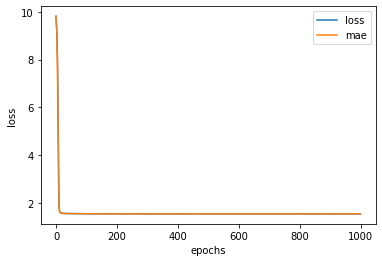

In [33]:
# Plot history (also known as a loss curve or a training curve)
plt.figure(figsize=(30,20));
pd.DataFrame(history_7.history).plot();
plt.ylabel("loss");
plt.xlabel("epochs");